In [14]:
import numpy as np
import matplotlib.pyplot as plt


a = np.array([[0, 2, 1], [0.3, 0, 0.3], [1, 1, 0]])
k = np.array([[0, 0, 0], [0, 3, 0], [0, 0, 1]])
# a = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
# k = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 1]])
w = np.zeros((3, 3))
for i in range(len(a)):
    for weight in a[i]:
        w[i, i] += weight
l = w - a
r = np.array([[-15., 0.], [-10., 0.], [-5., 0.]])
acceleration_l = np.array([0., 0.])
velocity_l = np.array([6., 0.])
position_l = np.array([20., 50.])
positions = np.array([[6., 60.], [10., 40.], [16., 70.]])
velocities = np.array([[10., 5.], [8., 4.], [9., 3.]])
acceleration = [acceleration_l for _ in range(3)]
acceleration = (acceleration - (l.dot(positions - r + velocities)) -
                k.dot((positions - position_l) - r + (velocities - velocity_l)))
accelerations_list = [acceleration]
positions_list = [positions]
velocities_list = [velocities]
positions_l = [position_l]
velocities_l = [velocity_l]

times = 1000
L = 10
interval = L / times
flag = 0
flag_position_x = 0
flag_position_y = 0
flag_velocity_x = 0
flag_velocity_y = 0
position_x_courage_time = 0
position_y_courage_time = 0
velocity_x_courage_time = 0
velocity_y_courage_time = 0
temp_times = 0

for time in range(1, times + 1):
    error_position = positions_list[time - 1] - positions_l[time - 1] - r
    error_velocity = velocities_list[time - 1] - velocities_l[time - 1]
    if ((np.abs(error_position[:, 0]) >= 0.001)).any() == False:
        if flag_position_x == 0:
            print(f"x方向的位置收敛时间为:{time * interval}")
            flag_position_x += 1
            position_x_courage_time = time * interval
            flag += 1
    if ((np.abs(error_position[:, 1]) >= 0.001)).any() == False:
        if flag_position_y == 0:
            print(f"y方向的位置收敛时间为:{time * interval}")
            flag_position_y += 1
            position_y_courage_time = time * interval
            flag += 1
    if ((np.abs(error_velocity[:, 0]) >= 0.001)).any() == False:
        if flag_velocity_x == 0:
            print(f"x方向的速度收敛时间为:{time * interval}")
            flag_velocity_x += 1
            velocity_x_courage_time = time * interval
            flag += 1
    if ((np.abs(error_velocity[:, 1]) >= 0.001)).any() == False:
        if flag_velocity_y == 0:
            print(f"y方向的速度收敛时间为:{time * interval}")
            flag_velocity_y += 1
            velocity_y_courage_time = time * interval
            flag += 1
    if flag == 4:
        temp_times = time
        break
    new_acceleration = accelerations_list[time - 1].copy()
    new_position = positions_list[time - 1].copy()
    new_velocity = velocities_list[time - 1].copy()
    velocity = new_velocity * interval
    acceleration = new_acceleration * interval
    new_position += velocity
    new_velocity += acceleration
    new_position_l = positions_l[time - 1].copy()
    new_position_l += velocity_l * interval
    new_velocity_l = velocities_l[time - 1].copy()
    new_velocity_l += acceleration_l * interval
    acceleration = [acceleration_l for _ in range(3)]
    positions_list.append(new_position)
    velocities_list.append(new_velocity)
    positions_l.append(new_position_l)
    velocities_l.append(new_velocity_l)
    acceleration = (acceleration - (l.dot(new_position - r + new_velocity)) -
                    k.dot((new_position - positions_l[time]) - r + (new_velocity - velocities_l[time])))
    accelerations_list.append(acceleration)

if flag != 4:
    temp_times = times
accelerations_list = np.concatenate([acceleration[np.newaxis, :] for acceleration in accelerations_list], axis=0)
positions_list = np.concatenate([position[np.newaxis, :] for position in positions_list], axis=0)
velocities_list = np.concatenate([velocities[np.newaxis, :] for velocities in velocities_list], axis=0)

x方向的位置收敛时间为:6.21
y方向的速度收敛时间为:6.78
x方向的速度收敛时间为:7.11
y方向的位置收敛时间为:8.99


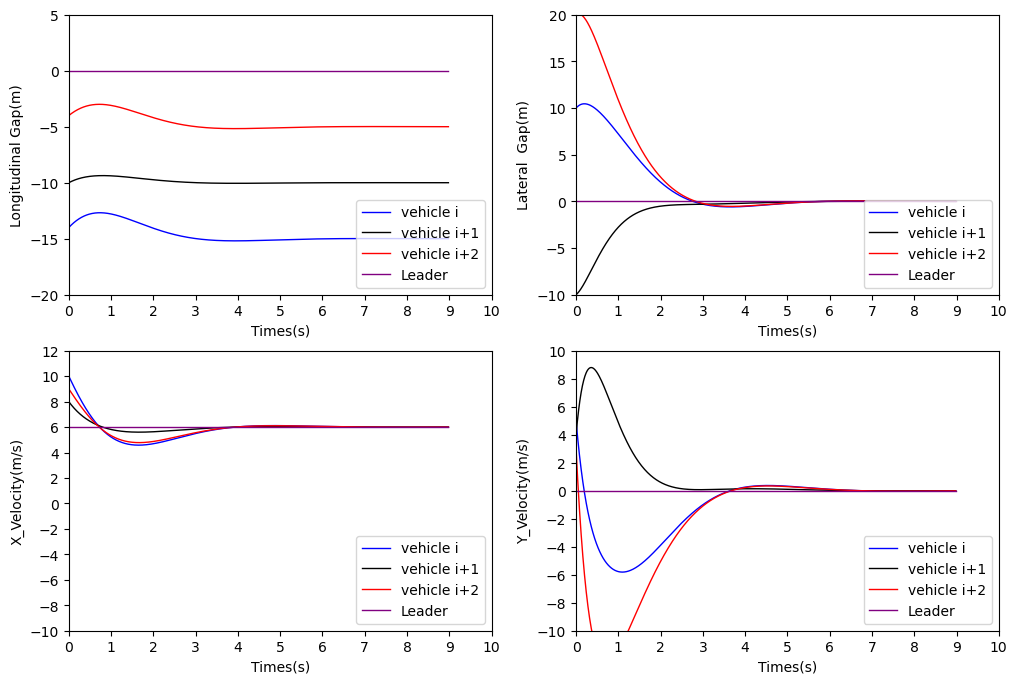

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

times_x = []
for i in range(temp_times):
    times_x.append(i * interval)
# Longitudinal Gap
temp_x_i_Gap = []
temp_x_i1_Gap = []
temp_x_i2_Gap = []
positions_l_x = []
for i in range(temp_times):
    temp_x_i_Gap.append(positions_list[i][0][0]-positions_l[i][0])
    temp_x_i1_Gap.append(positions_list[i][1][0]-positions_l[i][0])
    temp_x_i2_Gap.append(positions_list[i][2][0]-positions_l[i][0])
    positions_l_x.append(positions_l[i][0]-positions_l[i][0])
axs[0][0].plot(times_x, temp_x_i_Gap, color='blue',lw=1,label='vehicle i')
axs[0][0].plot(times_x, temp_x_i1_Gap, color='black',lw=1,label='vehicle i+1')
axs[0][0].plot(times_x, temp_x_i2_Gap, color='red',lw=1,label='vehicle i+2')
axs[0][0].plot(times_x, positions_l_x,color='purple',lw=1,label='Leader')
axs[0][0].legend(loc='lower right')
axs[0][0].set_xlim(0, 10)
axs[0][0].set_ylim(-20, 5)
axs[0][0].set_xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
axs[0][0].set_yticks((-20, -15, -10, -5, 0, 5))
axs[0][0].set_xlabel('Times(s)')
axs[0][0].set_ylabel('Longitudinal Gap(m)')

# Lateral  Gap(m)
temp_y_i_Gap = []
temp_y_i1_Gap = []
temp_y_i2_Gap = []
positions_l_y = []
for i in range(temp_times):
    temp_y_i_Gap.append(positions_list[i][0][1]-positions_l[i][1])
    temp_y_i1_Gap.append(positions_list[i][1][1]-positions_l[i][1])
    temp_y_i2_Gap.append(positions_list[i][2][1]-positions_l[i][1])
    positions_l_y.append(positions_l[i][1]-positions_l[i][1])
axs[0][1].plot(times_x, temp_y_i_Gap, color='blue',lw=1,label='vehicle i')
axs[0][1].plot(times_x, temp_y_i1_Gap, color='black',lw=1,label='vehicle i+1')
axs[0][1].plot(times_x, temp_y_i2_Gap, color='red',lw=1,label='vehicle i+2')
axs[0][1].plot(times_x, positions_l_y,color='purple',lw=1,label='Leader')
axs[0][1].legend(loc='lower right')
axs[0][1].set_xlim(0, 10)
axs[0][1].set_ylim(-10, 20)
axs[0][1].set_xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
axs[0][1].set_yticks((-10, -5, 0, 5, 10, 15, 20))
axs[0][1].set_xlabel('Times(s)')
axs[0][1].set_ylabel('Lateral  Gap(m)')

# X_velocity
temp_x_i = []
temp_x_i1 = []
temp_x_i2 = []
velocities_l_x = []
for i in range(temp_times):
    temp_x_i.append(velocities_list[i][0][0])
    temp_x_i1.append(velocities_list[i][1][0])
    temp_x_i2.append(velocities_list[i][2][0])
    velocities_l_x.append(velocity_l[0])
axs[1][0].plot(times_x, temp_x_i, color='blue',lw=1,label='vehicle i')
axs[1][0].plot(times_x, temp_x_i1, color='black',lw=1,label='vehicle i+1')
axs[1][0].plot(times_x, temp_x_i2, color='red',lw=1,label='vehicle i+2')
axs[1][0].plot(times_x, velocities_l_x,color='purple',lw=1,label='Leader')
axs[1][0].set_xlim(0, L)
axs[1][0].set_ylim(-L, L+2)
axs[1][0].set_xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
axs[1][0].set_yticks((-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12))
axs[1][0].legend(loc='lower right')
axs[1][0].set_xlabel('Times(s)')
axs[1][0].set_ylabel('X_Velocity(m/s)')

# Y_velocity
temp_y_i = []
temp_y_i1 = []
temp_y_i2 = []
velocities_l_y = []
for i in range(temp_times):
    temp_y_i.append(velocities_list[i][0][1])
    temp_y_i1.append(velocities_list[i][1][1])
    temp_y_i2.append(velocities_list[i][2][1])
    velocities_l_y.append(velocity_l[1])
axs[1][1].plot(times_x, temp_y_i, color='blue',lw=1,label='vehicle i')
axs[1][1].plot(times_x, temp_y_i1, color='black',lw=1,label='vehicle i+1')
axs[1][1].plot(times_x, temp_y_i2, color='red',lw=1,label='vehicle i+2')
axs[1][1].plot(times_x, velocities_l_y,color='purple',lw=1,label='Leader')
axs[1][1].set_xlim(0, L)
axs[1][1].set_ylim(-L, L)
axs[1][1].set_xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
axs[1][1].set_yticks((-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10))
axs[1][1].legend(loc='lower right')
axs[1][1].set_xlabel('Times(s)')
axs[1][1].set_ylabel('Y_Velocity(m/s)')

plt.show()
fig.savefig('Case_One.png')

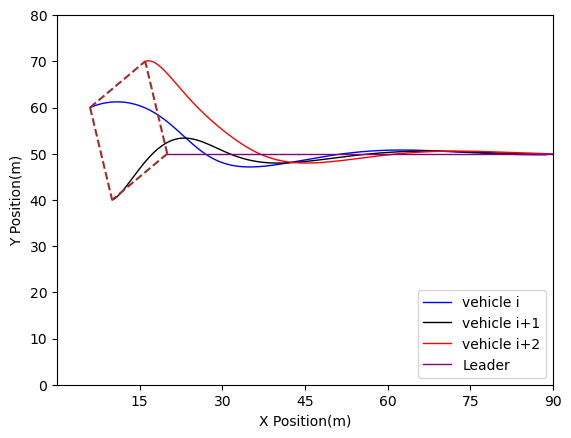

In [11]:
# position
temp_position_xi = []
temp_position_xi1 = []
temp_position_xi2 = []
temp_position_l_x = []
temp_position_yi = []
temp_position_yi1 = []
temp_position_yi2 = []
temp_position_l_y = []
for i in range(temp_times):
    temp_position_xi.append(positions_list[i][0][0])
    temp_position_xi1.append(positions_list[i][1][0])
    temp_position_xi2.append(positions_list[i][2][0])
    temp_position_l_x.append(positions_l[i][0])
    temp_position_yi.append(positions_list[i][0][1])
    temp_position_yi1.append(positions_list[i][1][1])
    temp_position_yi2.append(positions_list[i][2][1])
    temp_position_l_y.append(positions_l[i][1])
plt.plot(temp_position_xi, temp_position_yi, color='blue',lw=1,label='vehicle i')
plt.plot(temp_position_xi1, temp_position_yi1, color='black',lw=1,label='vehicle i+1')
plt.plot(temp_position_xi2, temp_position_yi2, color='red',lw=1,label='vehicle i+2')
plt.plot(temp_position_l_x, temp_position_l_y,color='purple',lw=1,label='Leader')
plt.legend(loc='lower right')
plt.xlim(0, 60)
plt.ylim(0, 80)
plt.xticks((15, 30, 45, 60, 75, 90)) # 
plt.yticks((0, 10, 20, 30, 40, 50, 60, 70, 80))
plt.plot((positions_l[0][0],positions_list[0][2][0]),(positions_l[0][1],positions_list[0][2][1]),linestyle='--', color='brown')
plt.plot((positions_l[0][0],positions_list[0][1][0]),(positions_l[0][1],positions_list[0][1][1]),linestyle='--', color='brown')
plt.plot((positions_list[0][0][0],positions_list[0][2][0]),(positions_list[0][0][1],positions_list[0][2][1]),linestyle='--', color='brown')
plt.plot((positions_list[0][0][0],positions_list[0][1][0]),(positions_list[0][0][1],positions_list[0][1][1]),linestyle='--', color='brown')
# plt.plot((positions_l[0][0],positions_list[50][2][0]),(positions_l[0][1],positions_list[50][2][1]),linestyle='--', color='brown')
# plt.plot((positions_l[0][0],positions_list[50][1][0]),(positions_l[0][1],positions_list[50][1][1]),linestyle='--', color='brown')
# plt.plot((positions_list[50][0][0],positions_list[50][2][0]),(positions_list[50][0][1],positions_list[50][2][1]),linestyle='--', color='brown')
# plt.plot((positions_list[50][0][0],positions_list[50][1][0]),(positions_list[50][0][1],positions_list[50][1][1]),linestyle='--', color='brown')
plt.xlabel('X Position(m)')
plt.ylabel('Y Position(m)')
plt.show()